In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
# параметры распределений
mu0, mu01, sigma0 = -2., 0.5 , 1.
mu1, mu11, sigma1 = 3., 1.5,  2.

In [24]:
def sample(d0, d1, n=32):
    x0 = d0.rsample((n,))
    #print ("x0 = ", x0)
    x1 = d1.rsample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [25]:
#d0 = torch.distributions.Normal(torch.tensor([mu0]), torch.tensor([sigma0]))
#d1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))
d0 = torch.distributions.Normal(torch.tensor([mu0, mu01]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1, mu11]), torch.tensor([sigma1]))

In [26]:
layer = nn.Linear(2, 1)
#layer = nn.Linear(1, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([-0.1663,  0.0561]), tensor(-0.2846)]


In [27]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.925469
Ошибка после 1 итераций: 0.375433
Ошибка после 2 итераций: 0.269782
Ошибка после 3 итераций: 0.226521
Ошибка после 4 итераций: 0.202328
Ошибка после 5 итераций: 0.184931
Ошибка после 6 итераций: 0.176520
Ошибка после 7 итераций: 0.167247
Ошибка после 8 итераций: 0.161444
Ошибка после 9 итераций: 0.157692
Ошибка после 10 итераций: 0.152252
Ошибка после 11 итераций: 0.149639
Ошибка после 12 итераций: 0.146248
Ошибка после 13 итераций: 0.144008
Ошибка после 14 итераций: 0.142813
Ошибка после 15 итераций: 0.140955
Ошибка после 16 итераций: 0.138656
Ошибка после 17 итераций: 0.137547
Ошибка после 18 итераций: 0.136029
Ошибка после 19 итераций: 0.135041


In [28]:
x_scale = np.linspace(-10, 10, 5000)
x_scaleD2=np.array([np.linspace(-10, 10, 5000), np.linspace(-10, 10, 5000)]).reshape(-1,2)
d0D2_pdf = stats.norm.pdf(x_scaleD2, [mu0, mu01], sigma0) 
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
d1D2_pdf = stats.norm.pdf(x_scaleD2, [mu1, mu11], sigma1)


x_tensor = torch.tensor(x_scaleD2.reshape(-1,2), dtype=torch.float)

print (x_tensor.shape)

torch.Size([5000, 2])


In [29]:
with torch.no_grad():
    dist = torch.sigmoid(layer(x_tensor)).numpy()
ratio = d1D2_pdf / (d1D2_pdf + d0D2_pdf)

In [36]:
d1D2_pdf.shape

(5000, 2)

In [30]:
print (x_tensor.shape)
print(dist.flatten().shape)
print(d0_pdf.shape)

torch.Size([5000, 2])
(5000,)
(5000,)


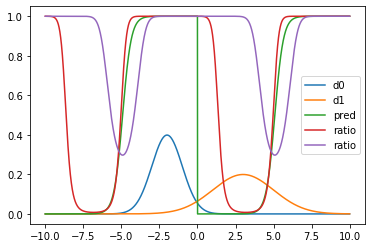

In [35]:
plt.plot(x_scale, d0_pdf, label='d0') 
plt.plot(x_scale, d1_pdf, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.legend();

In [32]:
print([p.data[0] for p in layer.parameters()])

[tensor([1.4737, 0.3044]), tensor(-0.2898)]


In [33]:
torch.log(torch.sigmoid(torch.tensor(-100.)))

tensor(-inf)

In [34]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)